In [1]:
import pandas as pd
import seaborn as sns

from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
X = pd.read_csv("study_performance.csv")

y = X[["math_score", "reading_score", "writing_score"]]
X = X.drop(columns=["math_score", "reading_score", "writing_score"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape

(700, 5)

In [3]:
estimators = [
    ("one_hot", OneHotEncoder(handle_unknown='ignore')),
    ("clf", RandomForestRegressor())
]

pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('one_hot', OneHotEncoder(handle_unknown='ignore')),
                ('clf', RandomForestRegressor())])

In [4]:
params = {
    "min_samples_leaf": 1,
    "n_jobs": None,
    "min_weight_fraction_leaf": 0.0,
    "max_leaf_nodes": None,
    "bootstrap": True,
    "warm_start": True,
    "min_impurity_decrease": 0.0,
    "ccp_alpha": 0.0,
    "criterion": "squared_error",
    "verbose": 0,
    "min_samples_split": 2,
    "max_depth": 3,
    "max_features": 0.32534401117082246,
    "monotonic_cst": None,
    "n_estimators": 8,
    "oob_score": False,
    "max_samples": 0.8920088860131657,
    "random_state": 0
}

pipe[-1].set_params(**params)

pipe.fit(X_train, y_train["math_score"])
root_mean_squared_error(
    y_test["math_score"],
    pipe.predict(X_test)
)

12.914087293595063

/home/eloybg97/projects/kaggle-competitions/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='error', ylabel='Count'>

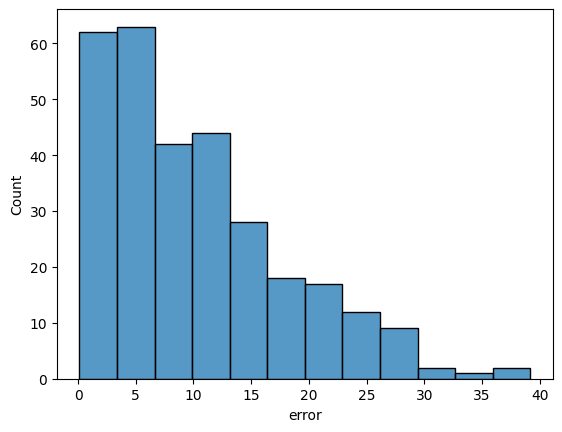

In [5]:

data = pd.DataFrame(data={
    "y_true": y_test["math_score"],
    "y_pred": pipe.predict(X_test)
})

data["error"] = abs(data.y_true - data.y_pred)

sns.histplot(data, x="error")